# ECE 670 X1 Mini Project 1

## Task 1 - Mosquito Trap Data and Weather Data

<b>Problem Statement</b>

For Task 1, we were tasked in the creation of 3 regression models using Edmonton weather data and Edmonton Mosquito Trap data. These models were meant to represent a function between the number of observed mosquitoes when considering a number of weather features.

In total, 3 models were created:
1. A linear regression model to represent the number of observed mosquitoes given a number of weather features. 
2. A linear regression model to represent the number of female mosquitoes given the same weather data.
3. A polynomial model to model the number of female mosquitoes given the same weather data.

### Data Pre-processing

Prior to creation of a linear regression model, both data sets (Edmonton Mosquito Trap Data and Edmonton Weather Data) had to be concatenated into a singular data set for analysis. During the initial inspection of the data, the following was observed:
1. Additional logic had to be added to resolve the 'time grid' utilized by the two sets of data. Where the Mosquito Trap Data was sampled at a frequency of one data point per week, Edmonton Weather data was sampled once every hour. 
2. Because Edmonton weather data is an instantaneous measure at the recorded time, some kind of aggregation of the weather data is desired to better match the Mosquito Trap data, such as the utilization and calculation of a moving average for certain features in the weather data set (humidity, temp, dew point, wind_dir_10s, wind_speed, health_index)
3. Within both data sets, some features have inconsistent data and therefore was ignored from the analysis. Columns with limited or no data, such as visibility, cloud cover, humidex, windchill and solar radiation were identified as unncessary to our analysis, and was removed. Similarly, rows with missing data points were also removed from our analysis.
4. For the Edmonton Mosquito Trap data, rows marked with UnID from the IDd column represented bad data and were removed from the analysis. 

<b>Mosquito Data Pre-processing</b>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mosquito_df = pd.read_csv('data_files/Mosquito_Trap_Data.csv')

In [ ]:
mosquito_df

In [ ]:
# Remove rows marked as No in mosquito df for the include column
# Remove rows marked as UnID from IDd column
mosquito_df = mosquito_df[mosquito_df.Include != 'No']
mosquito_df = mosquito_df[mosquito_df.IDd != 'UnID']

mosquito_df.drop('Include', axis=1, inplace=True)
mosquito_df.drop('IDd', axis=1, inplace=True)
mosquito_df.drop('Location', axis=1, inplace=True)

# One hot encode region for mosquitos
# Remove rows with missing values
mosquito_df.dropna()

<b>Edmonton Weather Data Pre-processing</b>

In [ ]:
weather_df = pd.read_csv('data_files/weather_stats_edmonton.csv')

In [ ]:
# Removal of following columns: visibility, cloud cover, humidex, windchill, solar radiation
weather_df.drop('visibility', axis=1, inplace=True)
weather_df.drop('cloud_cover_4', axis=1, inplace=True)
weather_df.drop('cloud_cover_8', axis=1, inplace=True)
weather_df.drop('cloud_cover_10', axis=1, inplace=True)
weather_df.drop('humidex', axis=1, inplace=True)
weather_df.drop('windchill', axis=1, inplace=True)
weather_df.drop('solar_radiation', axis=1, inplace=True)

# Remove rows with missing values
weather_df.dropna()

In [ ]:
# Moving averages for the following columns in weather: 
# humidity, temp, dew point, wind_dir_10s, wind_speed, health_index

def moving_average(df, col_name, num_of_days):
    moving_average_df = df.iloc[:,1].rolling(window=num_of_days).mean()
    return moving_average_df

<b>Concatenation of the Two Data Sets</b>

1. Date format are different between the data sets.
2. Parsing dates from pandas?
4. Match Time Durations between weather and Mosquito DF - Keep only data from weather df

Use date from mosquito trap as starting point for going back in history -> Build features by
computing a moving average from various points going back in time i.e 2 days, 1 week, 2 week etc.

Allows us to take into account breeding conditions leading to the number of mosquitoes

### Regression Models

<b>Model A: Number of Mosquitos vs. Weather Features (Linear Regression)</b>

In [ ]:
from sklearn import linear_model

lreg = linear_model.LinearRegression()

In [ ]:
train_data = data.sample(150).copy()
train_x = train_data.loc[:,['radio']].values
train_y = train_data['sales'].values.reshape(len(train_x),1)

plt.scatter(X_train,Y_train,label='train')
plt.scatter(X_test,Y_test, label='test')
plt.legend();

In [ ]:
lreg.fit(train_x,train_y)

In [ ]:
wsk = lreg.intercept_,lreg.coef_[0]
wsk

In [ ]:
plt.scatter(X,Y)
plt.plot(X,wsk[0]+wsk[1]*X,'r')
plt.plot(X,w[0]+w[1]*X,'g');

In [ ]:
Y_pred_sk = sklreg.predict(X_test)

In [ ]:
plt.scatter(X_test , Y_test)
plt.plot(X_test , Y_pred_sk, 'g', label='scikit-learn');
plt.legend();

In [ ]:
cost_test_sk = linreg.cost_function(Features, Y_test, wsk)
cost_test_sk

In [ ]:
score_train_sk = sklreg.score(X_train,Y_train)
score_test_sk = sklreg.score(X_test,Y_test)
score_train_sk, score_test_sk

<b>Model B: Number of Female Mosquitos vs. Weather Features (Linear Regression)</b>

In [ ]:
data = pd.read_csv('data/Advertising.csv')
X = data.loc[:,['radio','TV']].values
Y = data['sales'].values.reshape(len(X),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.3, random_state = 0)

In [ ]:
import linear_regression as linreg
%time w, h, w_h = linreg.train(X_train,Y_train, 0.00001, 200000)

In [ ]:
plt.plot(h);

In [ ]:
sklreg = linear_model.LinearRegression()
sklreg.fit(X_train,Y_train)

In [ ]:
# Using Standardization
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)

sklreg.fit(X_train_scaled, Y_train)

In [ ]:
wsk = [sklreg.intercept_[0],sklreg.coef_[0][0],sklreg.coef_[0][1]]

In [ ]:
bias = np.ones(shape=(len(X_test),1))
Features = np.append(bias, X_test, axis=1)
Y_pred = linreg.predict(Features,w)

In [ ]:
Y_pred_sk = sklreg.predict(X_test)

In [ ]:
import pandas as pd
pd.DataFrame({'':['Widthout normalization','With normalization','With standarization','scikit-learn'],
              'Train score':[score(X_train, Y_train, w),
                             score(X_train_norm, Y_train, w_n),
                             score(X_train_std, Y_train, w_s),
                             sklreg.score(X_train,Y_train)],
              'Test score':[score(X_test, Y_test, w),
                            score(normalization(X_test), Y_test, w_n),
                            score(standardization(X_test), Y_test, w_s),
                            sklreg.score(X_test,Y_test)]})

<b>Model C: Number of Female Mosquitos vs. Weather Features (Polynomial Regression)</b>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

sklreg_poly = linear_model.LinearRegression()
sklreg_poly.fit(X_train_poly,Y_train)

Xl = np.linspace(0, 1, 100).reshape(100,1)
Xl_poly = poly_features.fit_transform(Xl)

Y_pred = sklreg_poly.predict(Xl_poly)
plt.scatter(X_train,Y_train)
plt.plot(Xl,Y_pred,'r');

sklreg_poly.score(X_train_poly,Y_train),sklreg_poly.score(poly_features.fit_transform(X_test),Y_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def plot_models(X,Y,X_test, Y_test, degrees):
    for i,degree in enumerate(degrees):
        ax = plt.subplot(1, len(degrees), i + 1)
        poly_features = PolynomialFeatures(degree=degree)
        sklreg = linear_model.LinearRegression()
        pipeline = Pipeline([("polynomial_features", poly_features),
                             ("linear_regression", sklreg)])
        pipeline.fit(X,Y)
        Y_pred = pipeline.predict(X)
        plt.plot(X_test, pipeline.predict(X_test), label="Model")
        plt.scatter(X, Y, edgecolor='b', s=20, label="Samples")
        plt.scatter(X_test, Y_test, edgecolor='r',s=15, label="Test")
        plt.xlabel("x")
        plt.title("Degree {}".format(degree))
        plt.legend(loc="best")

In [ ]:
plt.figure(figsize=(14, 5))
plot_models(X_train,Y_train,X_test,Y_test,[1,2,9])

<b>Feature Selection</b>

In [ ]:
from sklearn.feature_selection import f_regression

data = pd.read_csv('data/Advertising.csv')
X = data.loc[:,['radio','TV','newspaper']].values
Y = data['sales'].values

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
F_test,p_value = f_regression(X_poly,Y)
pd.DataFrame({'feature':poly_features.get_feature_names(),
              'F_test':F_test,'p_value':p_value})

In [ ]:
from sklearn.feature_selection import SelectKBest

X_best = SelectKBest(f_regression,5).fit_transform(X_poly, Y)

In [ ]:
X_poly.shape, X_best.shape

## Task 2 - Ionosphere Dataset

For task 2, we were tasked in the creation of a predictor using three different models/approaches, which are shown in the following order: (1) Regression, (2) Support Vector Machine and (3) Random Forest. 

The analyzed dataset for this task was the Ionosphere dataset, which describes radar data that is collector by a system that is located in Goose Bay Labrador. The system, consisting of a phased array of 16 high frequency antennas, targeted free electrons in the ionosphere. From these observations, a "good" radar return and "bad" radar return can be recorded, where a "good" return is indicative that the radar return showed evidence of some kind of structure in the ionophere and a "bad" return indicates that the signal passed through the ionosphere.

Hence, for classification, our goal is the creation of a predictor that should perform the following classification:
g for good and b for bad = function(ionosphere features)

In our analysis of each created model, each model is conducted and analyzed using a split of training and testing data. Following the intial construction of all models, a 10-fold cross validation is performed to compare model performance betewen different models/approaches. Lastly, this information, along with the results of a t-test are used to identify the best model.

### Ionosphere Data Set Pre-processing

Prior to model creation, the ionosphere data was pre-processed. Note that upon visual inspection of the data, the second column was found to have no variance (e.g. all values were the same) and therefore does not provide a significant contribution to the data. Hence, the second column was removed from the analysis.

For classification, the label was changed to a binary encoding where "g" was mapped to a 1 value and "b" was mapped to a 0 value. This is necessary to construct a logistic regression model so that the regression model maps to a logical value following the performed classification.

In [55]:
# Naming of all columns
colnames=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 
          'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
          'f30', 'f31', 'f32', 'f33', 'f34', 'label']

ionosphere_df = pd.read_csv('data_files/ionosphere.data', names=colnames, header=None)
ionosphere_df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f26,f27,f28,f29,f30,f31,f32,f33,f34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [56]:
# Encode the categories as 1 and 0 (g = 1, b = 0)
ionosphere_df['label'] = ionosphere_df.label.astype('category')
encoding = {'g': 1, 'b': 0}
ionosphere_df.label.replace(encoding, inplace=True)

# Removal of the second column (f2) as all of its values are identical and there is no variance
ionosphere_df.drop(columns=['f2'], inplace=True)

X = ionosphere_df.values[:, :-1]
y = ionosphere_df.values[:, -1]

In [57]:
from sklearn.preprocessing import StandardScaler

# Perform scaling on feature set data
X_scaled = StandardScaler().fit_transform(X)

**NEED TO REWORD THE FOLLOWING**
An important aspect that should be considered when we have multiple features is that not all the features contribute to the model's performance in the same way. Some features are more important than others. To determine which features are most significant, we can use the measures, F-test and p-value.
        
**F-test** estimates the degree of linear dependency between two random variables when comparing their variances. (See [The F-test for Linear Regression](http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm) for an explanation how to calculate it.)

**p-value** is another measure that helps us determine the significance of each feature. It is used to validate or reject the **null hypothesis**. The null hypothesis ($H_0$) assumes that there is **no relationship** between a given input feature and the output. In the context of our model, it assumes that $\theta_i=0$ for $0 \leq i \le n$, where $n$ is the number of parameters. The meaning of the obtained p-values is as follows:

In [58]:
from sklearn.feature_selection import f_regression

F_test,p_value = f_regression(X_scaled,y)
pd.DataFrame({'F_test': F_test,'p_value':p_value})

,F_test,p_value
0,96.605478,2.747898e-20
1,128.762319,1.294785e-25
2,5.619616,1.830332e-02
3,126.961973,2.514817e-25
4,7.934810,5.125150e-03
5,88.829431,6.126046e-19
6,15.709751,8.958033e-05
7,33.230308,1.802057e-08
8,5.153808,2.380466e-02
9,10.124789,1.594186e-03


In [59]:
from sklearn.feature_selection import SelectKBest
X_best = SelectKBest(f_regression).fit_transform(X_scaled, y)

In [60]:
X_scaled.shape, X_best.shape

((351, 33), (351, 10))

<b>(1) Logistic Regression Model</b>

The logistic regression model was evaluated for both scaled and unscaled feature data.

In [61]:
from sklearn import linear_model
from sklearn import preprocessing

In [62]:
from sklearn.model_selection import KFold, cross_val_score

# Initialize cross validation for k-fold = 10
cross_validation = KFold(n_splits=10, random_state=1, shuffle=True)

In [63]:
logreg_model = linear_model.LogisticRegression(solver='lbfgs')

In [64]:
# Non-scaled data
logreg_scores = cross_val_score(logreg_model, X, y, scoring='accuracy', cv=cross_validation, n_jobs=-1)
logreg_scores

array([0.80555556, 0.94285714, 1.        , 0.85714286, 0.82857143,
       0.82857143, 0.91428571, 0.85714286, 0.8       , 0.88571429])

In [65]:
# Scaled data
logreg_scores = cross_val_score(logreg_model, X_scaled, y, scoring='accuracy', cv=cross_validation, n_jobs=-1)
logreg_scores

array([0.83333333, 1.        , 0.94285714, 0.85714286, 0.85714286,
       0.88571429, 0.91428571, 0.91428571, 0.82857143, 0.88571429])

In [66]:
# Selection of k-best
logreg_scores = cross_val_score(logreg_model, X_best, y, scoring='accuracy', cv=cross_validation, n_jobs=-1)
logreg_scores

array([0.83333333, 0.94285714, 0.94285714, 0.85714286, 0.8       ,
       0.85714286, 0.82857143, 0.97142857, 0.82857143, 0.94285714])

<b>(2) Support Vector Machine</b>

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

SVC(kernel='linear')

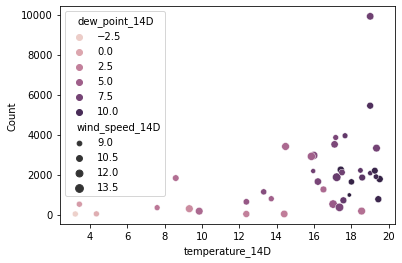

In [68]:
from sklearn.svm import SVC

svc_soft_model = SVC(kernel='linear')
svc_soft_model.fit(X_scaled, y)

In [69]:
Yp_soft = svc_soft_model.predict(X_scaled)

In [70]:
from sklearn.metrics import accuracy_score
print("Soft Margin Model accuracy:",accuracy_score(y,Yp_soft))

Soft Margin Model accuracy: 0.9430199430199431


In [71]:
# K-fold cross validation
svc_soft_model_scores = cross_val_score(model_soft, X_scaled, y, scoring='accuracy', cv=cross_validation, n_jobs=-1)
svc_soft_model_scores

array([0.83333333, 0.97142857, 0.94285714, 0.94285714, 0.8       ,
       0.88571429, 0.88571429, 0.91428571, 0.8       , 0.91428571])

<b>(3) Random Forest</b>

In [72]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=12)
random_forest_model.fit(X_scaled, y)

RandomForestClassifier(max_depth=12, n_estimators=50, random_state=0)

In [73]:
# K-fold cross validation
random_forest_model_scores = cross_val_score(model_soft, X_scaled, y, scoring='accuracy', cv=cross_validation, n_jobs=-1)
random_forest_model_scores

array([0.83333333, 0.97142857, 0.94285714, 0.94285714, 0.8       ,
       0.88571429, 0.88571429, 0.91428571, 0.8       , 0.91428571])

<b>Model Performance Comparison</b>

In [74]:
#t-test, comparison of model performance